# Resolvendo Kaggle Titanic

Este tutorial é para iniciantes e será divido em alguma partes

- Exploração de Análise de Dados (Exploratory Data Analysis - EDA) com visualização
- Extração de Características (Feature Extract)
- Modelagem de Dados (Data Modeling)
- Model Evaluate

Talvez nem todos os termos sejam traduzidos para o português, porque há muito conteúdo bom inglês (essas palavras estarão em itálico), também porque são termos muito usuados. Então espero que sirva de inspiração para se aprofundar um pouco mais nessa lingua, porém, vou me esforçar ao máximo para deixar todos os seus significados ou mesmo um link com mais detalhes.

Link do desafio no Kaggle, [Titanic](https://www.kaggle.com/c/titanic)

### Objetivo

O objetivo desse desafio é prever utilizando modelos de *machine learning* quem sobreviveria, para isso foi disponibilizado dois *datasets* que estão dentro da pasta titanic, o primeiro é **train.csv** que possui os dados dos sobreviventes(sim ou não) e suas características. O **test.csv** são os mesmos dados com suas caracterísicas, mas sem os sobreviventos onde no fim vamos usa-los para prever se sobreviveriam ou não.

### Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots


### Carregando conjunto de dados

Para carregar os dados será utilizada a biblioteca chamada [pandas](https://pandas.pydata.org/pandas-docs/version/0.21/index.html), amplamente utilizada no python, iremos utilizar o método **read_csv** para carregar nossas planilhas de dados que se tornaram DataFrames que é uma estrutura do pandas que permite manipular tabelas de forma simples. 

In [2]:
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')

Primeiro passo é olhar nosso dataset, para isso tem método chamado .head() que retorna por default os 5 primeiros dados do dataset.

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Esse método aceita argumentos, que são inteiros que indicam a quantidade de linhas que devem retornar.

In [5]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [6]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Agora vamos a explicação do significado de cada uma das colunas, que são nossas *features*.

**Features**: São os dados de entrada que podem ou não ter relevância no nosso dataset, como por exemplo **PassengerId** em uma primeira observação não tem muito significado como vamos ver mais para frente, porém, **Pclass** já faz muito diferença que pode aumentar as chances de sobreviventes.


1. **PassengerId**: Um identificar único para cada linha de dados dos passageiros.
2. **Survived**: Indicador se o passageiro sobreviveu, representado pelo valor 1 ou não sobreviveu, representado pelo valor 0.
3. **Pclass**: A classe do ticket do passageiro, sendo 1 Primeira Classe, 2 Segunda Classe e 3 Terceira classe.
4. **Name**: Nome do passageiro.
5. **Sex**: Genero no passageiro, sendo *male* masculino e *female* feminino.
6. **Age**: Idade do passageiro.
7. **SibSp**: Número de irmãos e/ou esposas (os) a bordo.
8. **Parch**: Número de pais de filhos a bordo.
9. **Ticket**: Número do Ticket.
10. **Fare**: A quantidade de dinheiro paga pela viagem.
11. **Cabin**: Número de pessoas na cabine.
12. **Embarked**: Porto onde é os passageiros embarcaram: 
    - **C** representa Cherbourg 
    - **Q** representa Queenstown
    - **S** representa Southampton.

Se forem encontrados valores NaN em qualquer coluna, significa que esses valores não foram gravados

Facilmente também é possível descobri a dimensão do dataFrame com o atributo **shape** que é 891 linhas e 12 colunas.

In [7]:
train.shape

(891, 12)

Outro método importante é o **.describe()** que nos mostra dados importantes por coluna como:
- count: Total de dados
- mean: A famosa média
- std: Standard Deviation, que chamamos de [desvio padrão](https://www.todamateria.com.br/desvio-padrao/).
- min: Menor valor
- 25%, 50%, 75% e max: A proporcionalidade dos dados.

train.describe()

Passando a opção **include = ['O']** retorna estatísticas das colunas.

In [8]:
train.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Hassan, Mr. Houssein G N",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


Esse resulta já podemos observar dados interessantes, primeiro observamos que o sexo masculino (*male*) e tem a frequência de 577 vezes, logo é possível se não houver nenhum valor NaN tenham 314 passageiros do sexo feminino (*female*).
Também observamos que 644 passageiros embarcaram no porto S, sendo a maioria.

Outro método usado é **.info()**, como o próprio nome já nos mostra exibe mais informações sobre os nossos dados, como a quantidade não nula e o tipo. Observamos que somente 204 das cabines e 714 das idades dos passageiros foi registrada.

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Comparando com o anterior, se o métod **.info()** mostra os valores que não são nulos, o **.isnull()** retorna os valores nulo e possuí o método **sum()** que faz sua soma com uma melhor exibição.

In [10]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Informações do test dataset

O dataFrame tem 418 linhas e 11 colunas.

In [11]:
test.shape

(418, 11)

Observamos que tem uma coluna a menos, sendo ela a *survided* porque vamos treinar nosso dataFrame *train* para prever se uma passageiro que está no dataFreme *test* e descobrir se teria chances de sobreviver ou não.

In [12]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Semelhante aos dados do dataFrame **train**, tem 332 dos 418 foram registrados a idade e o mesmo na cabine que dos 418 foram registrados somente 91.

In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


86 dados da idade e 327 da cabine estão nulos, sendo assim não registrados.

In [14]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Relação entre as Features x Sobreviventes

Nessa parte vamos analisar a relação entre as *features* (Lembrando que as nossas features são: PClass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked) e o número de sobreviventes (*suvirved*). Observaremos que cada *feature* pode mostrar diferentes chances de sobrevivência.

Para cada relação entre uma *feature* x *suvirved* vamos disponibilizar em uma visão de gráficos.

Primeiros vamos observar a porcentagem de sobreviventes de uma forma bem simples.


In [25]:
# dentro de train vamos pesquisar por todos os campos Survived iguail a 1 e depois igual a 0
survived = train[train['Survived'] == 1] 
not_survived = train[train['Survived'] == 0]

#  use o survived.head() e not_survived.head() para ver como ficou ambos array

print("Survived: %i (%.1f%%)"%(len(survived), float(len(survived) / len(train) * 100.0)))
print("Not Survived: %i (%.1f%%)"%(len(not_survived), float(len(not_survived) / len(train) * 100.0)))
print(len(train))

# Triste saber, mas mais da maioria não sobreviveu =/

Survived: 342 (38.4%)
Not Survived: 549 (61.6%)
891


#### PClass vs Survival

A primeira relação que vamos analisar é a classe do ticket, a coluna é *Pclass* e os valores são:

- 1 = Primeira Classe
- 2 = Segunda Classe
- 3 = Terceira Classe

Então quantos passageiros tem por classe?

In [27]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Dados não muitos surpreendentes, observamos que a maioria dos passageiros estão a terceira classe e a primeira e segunda classe tem número bem próximos, sendo a segunda classe tendo 32 passageiros a mais que a primeira.

Agora que chegamos nessa número vamos observar a quantidade de sobreviventes por classe


In [28]:
train.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

Com esse resultado fica bem claro sem precisar fazer qualquer conta que comprou o ticket para primeira classe teve mais chances de sobreviver do que a primeira e segunda.

In [48]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Para enterdemos o cálculo feito acima, vamos pegar a primeira classe como exemplo:

O que sabemos sobre a primeira classe:

- 136 sobreviventes e 80 que não sobreviveram
- o total de de pessoas nela é 216 (136 + 80)

Com esses dois valores chegamos a

136 / 216 = 0.629630

Então observamos que 62% das pessoas que obtiveram o ticket da primeira classe sobreviveram, em contra partida somente 24% das pessoas que compraram o ticket da terceira classe conseguiram sobreviver de acordo com o dataset disponibilizado.

O que podemos ver melhor no gráfica de barra em seguinda.

/home/dalton/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


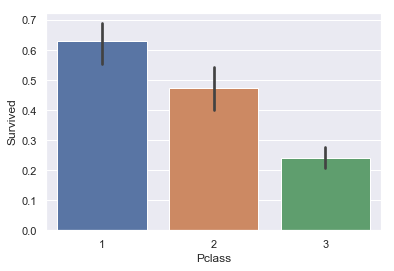

In [46]:
sns.barplot(x = 'Pclass', y = 'Survived', data = train)

#### Sex vs Survival

Seguindo os mesmos passos do item anterior e analisar os números que vamos obter.



In [38]:
train.Sex.value_counts() # total de male e female

male      577
female    314
Name: Sex, dtype: int64

In [39]:
train.groupby('Sex').Survived.value_counts() # sex agrupado por sobreviventes e não sobreviventes

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [49]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


/home/dalton/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


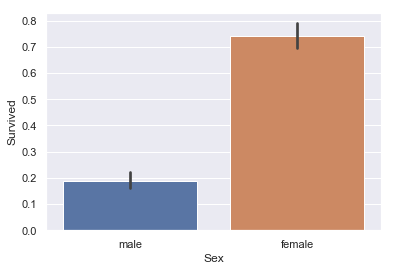

In [51]:
sns.barplot(x = 'Sex', y = 'Survived', data = train)

Como podemos analisar obtivemos os seguintes possíveis números:

- houve uma número muito mair de mulheres que sobreviveram em relação a homens 
- 74% das mulheres e 18% dos homens
- 233 das 314 mulheres sobreviveram